<a href="https://colab.research.google.com/github/kbarismath/Uber-Rides-Data-Analysis/blob/main/Uber_Rides_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [14]:
df.shape

(1156, 7)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


***'Purpose' column has 1156-653 null values.***

# DATA PREPROCESSING

In [16]:
df['PURPOSE'].fillna("NOT", inplace=True)

***Change the date columns to date_time format so that they can be used for furthetr analysis***

In [17]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],errors = 'coerce')

***converting time into four categories : morning, noon, evening, night***

In [18]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

df['day-night'] = pd.cut(x=df['time'], bins = [0, 10, 15, 19, 24], labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

In [19]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

#DATA VISUALIZATION

In [20]:
obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)

unique_values = {}

for col in obj_cols:
    unique_values[col] = df[col].unique().size
display(unique_values)

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

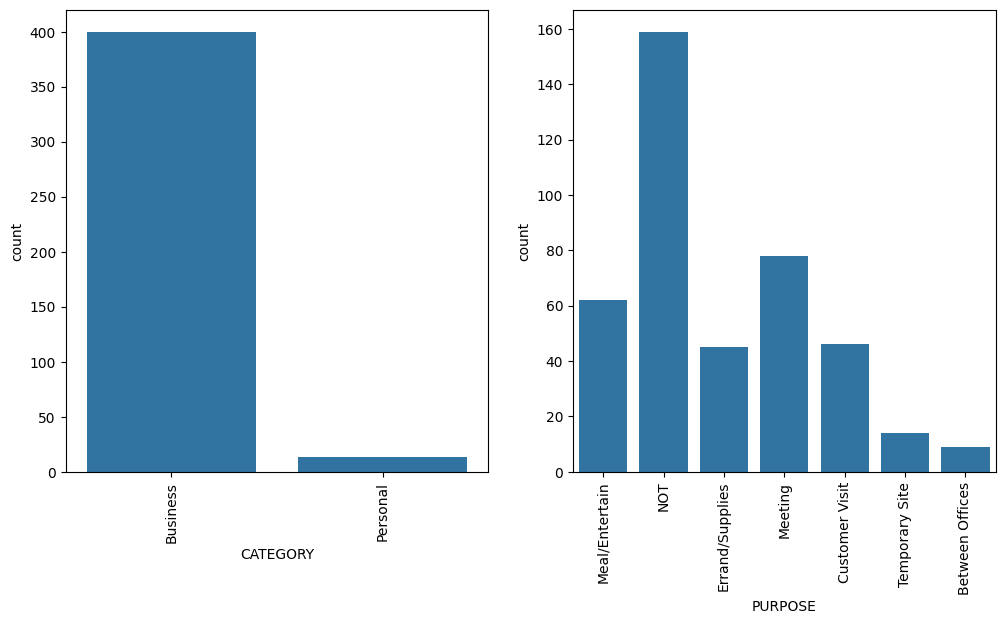

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=df['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x=df['PURPOSE'])
plt.xticks(rotation=90)
plt.show()

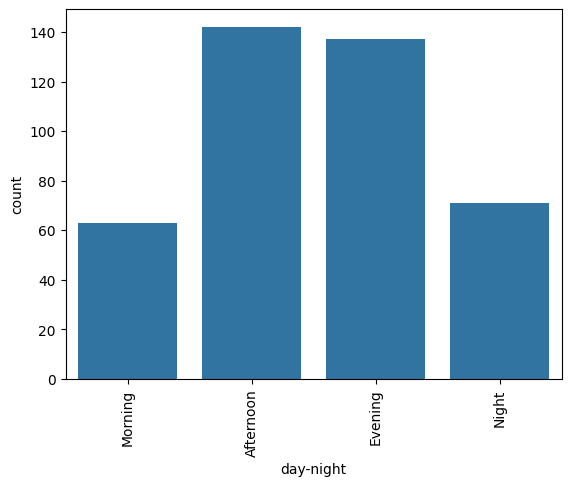

In [22]:
sns.countplot(x=df['day-night'])
plt.xticks(rotation=90)
plt.show()

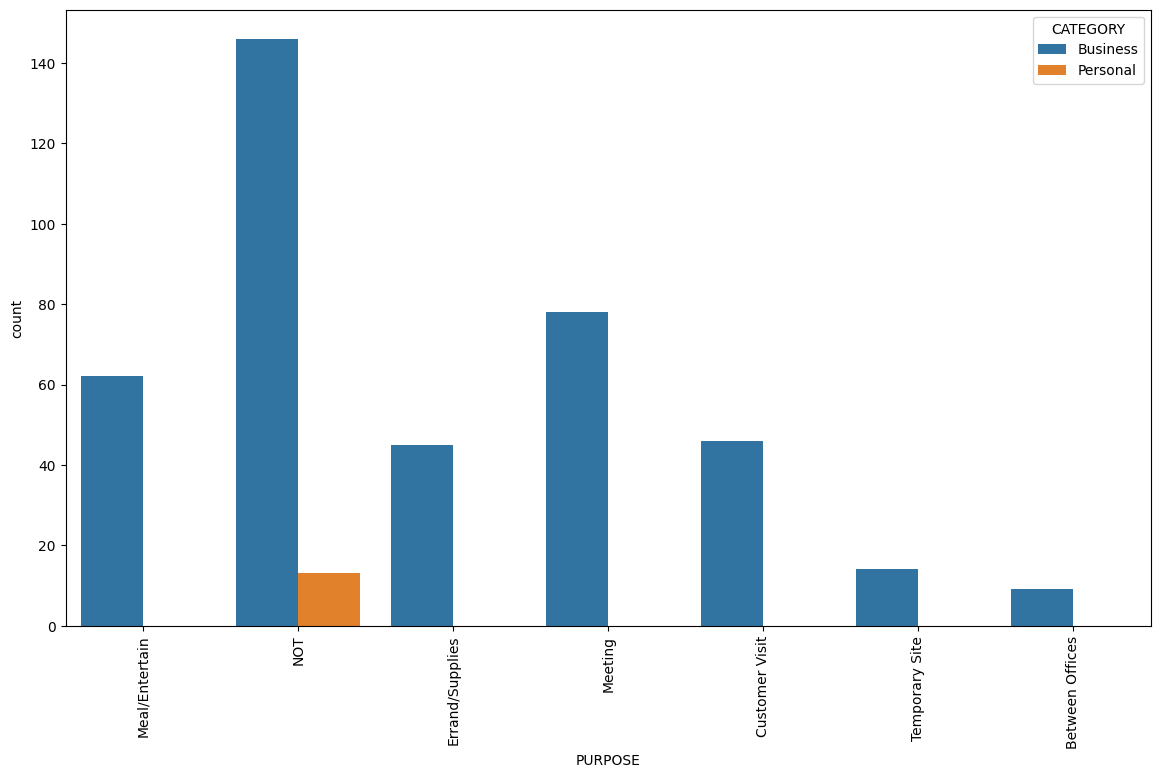

In [23]:
plt.figure(figsize=(14,8))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

#INSIGHTS
*   ***MOST OF THE UBER RIDES ARE USED FOR BUSINESS PURPOSES***
*   ***MOST PEOPLE USE UBER FOR MEETINGS AND MEAL/ENTERTAIN PURPOSES***
*   ***MOST OF THE UBER RIDES ARE BOOKED IN BETWEEN 10AM-5PM (AFTERNOON)***





#ONE HOT ENCODER ('CATEGORY', 'PURPOSE')

In [24]:
from sklearn.preprocessing import OneHotEncoder
obj_cols = ['CATEGORY', 'PURPOSE']
encoder = OneHotEncoder(sparse=False)
encoder_cols = pd.DataFrame(encoder.fit_transform(df[obj_cols]))
encoder_cols.index = df.index
encoder_cols.columns = encoder.get_feature_names_out()
df_final = df.drop(obj_cols, axis=1)
df = pd.concat([df_final, encoder_cols], axis = 1)

#CORRELATION MATRIX

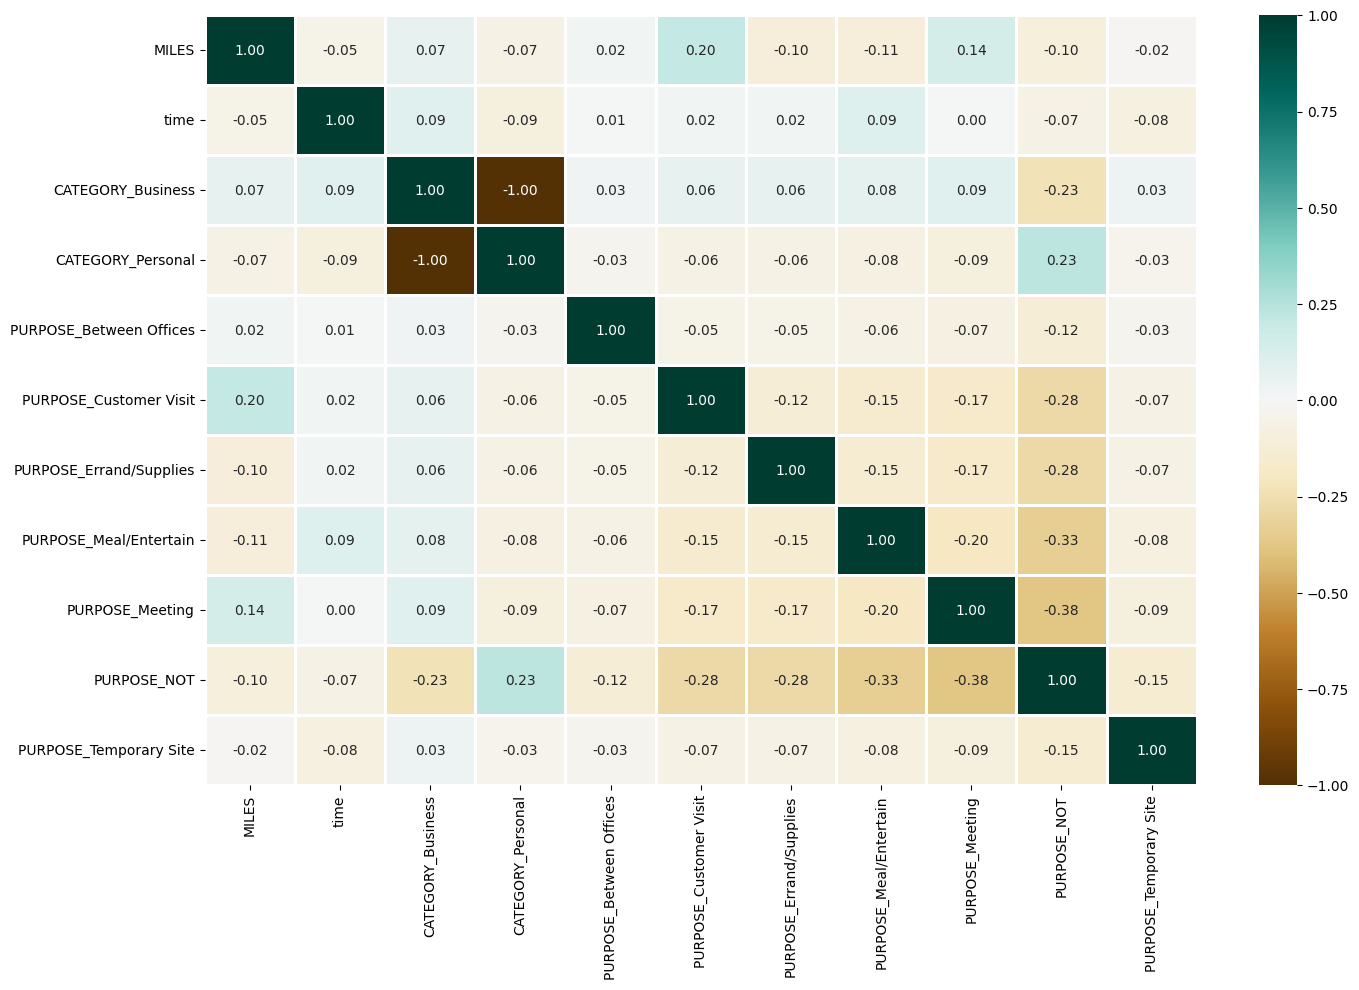

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), cmap= 'BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()

***INSIGHTS FROM CORRELATION MATRIX:***


*   *Business and Personal categories have high negative correlation.*

*   *There is not much correlation between features*




[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

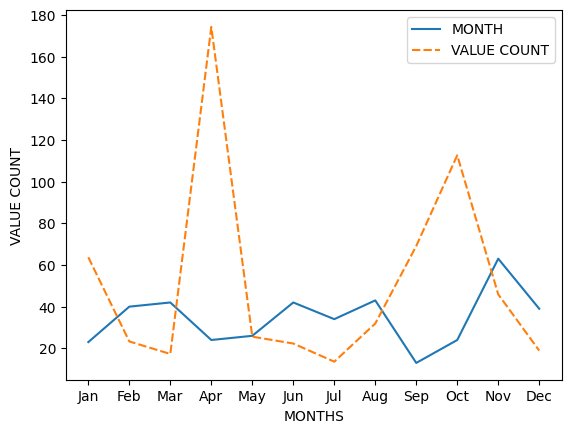

In [26]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0 : 'Jan', 2.0 : 'Feb', 3.0 : 'Mar', 4.0 : 'Apr', 5.0 : 'May', 6.0 : 'Jun', 7.0 : 'Jul', 8.0 : 'Aug', 9.0 : 'Sep', 10.0 : 'Oct', 11.0 : 'Nov', 12.0 : 'Dec'}
df["MONTH"] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort=False)

ds = pd.DataFrame({"MONTH": mon.values, "VALUE COUNT": df.groupby('MONTH', sort=False)['MILES'].max()})

p = sns.lineplot(data=ds)
p.set(xlabel="MONTHS",ylabel= "VALUE COUNT")

***The counts are very irregular. Kurtosis is large***

In [27]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu',4: 'Fri', 5: 'Sat', 6: 'Sun',}
df['DAY'] = df['DAY'].map(day_label)

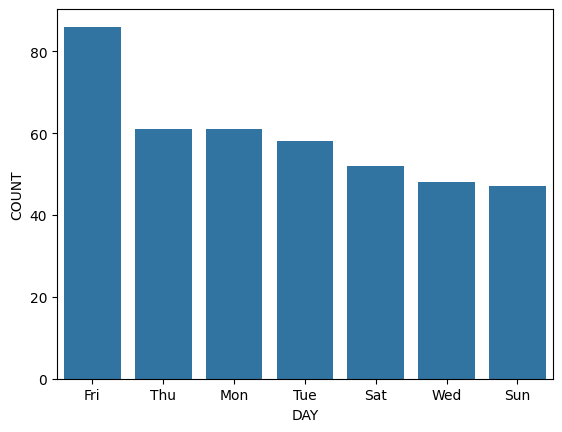

In [28]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y= day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

<Axes: xlabel='MILES', ylabel='Density'>

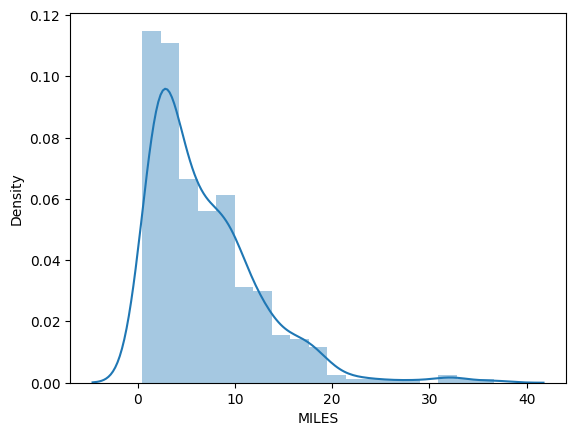

In [29]:
sns.distplot(df[df['MILES']<40]['MILES'])

#FINAL INSIGHTS


*   ***Most of the drives were booked for distances of 4-5 miles***
*   ***Most of the people use UBER for distances between 0-20 miles***

*   ***For distances more than 20 miles, drives are nearly negligible.***



